In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Problema 1

Los focos industriales deberán tener una vida media útil aceptable y una variación relativamente
pequeña en su duración. Si demasiado focos fallan menos de lo estipulado en la etiqueta como su
vida útil, los usuarios se molestan y, generalmente, cambian de marca de focos.
La fábrica, entonces, se interesa por evaluar la variabilidad de la duración de sus focos. Una
muestra aleatoria de 20 focos producidos por un fabricante que indica que la variación de la
duración de sus focos (desviación estándar) es de 150 horas, produjo los siguientes valores de vida
útil en horas.

| 2100 | 2302 | 1951 | 2067 | 2415 | 1883 | 2101 | 2146 | 2278 | 2019 |
|------|------|------|------|------|------|------|------|------|------|
| 1924 | 2183 | 2077 | 2392 | 2286 | 2501 | 1946 | 2161 | 2253 | 1827 |

In [96]:
data_1 = [2100, 2302, 1951, 2067, 2415, 1883, 2101, 2146, 2278, 2019]
data_2 = [1924, 2183, 2077, 2392, 2286, 2501, 1946, 2161, 2253, 1827]

focos = np.array(data_1 + data_2)

a) Revisa el supuesto de Normalidad ya que es requerido para usar el estadístico Chi-cuadrada
para el intervalo de varianza, ¿Qué se puede decir de la normalidad, es posible inferir que la
distribución de la variable sigue una distribución Normal?

In [97]:
shapiro_test = stats.shapiro(focos)
print(shapiro_test.pvalue)

0.905120077302235


In [98]:
alfa = 0.05
if shapiro_test.pvalue > alfa:
    print("No se tiene evidencia para rechazar Ho, lo más probable es que la variable sigue distribución Normal")
else:
    print("Se tiene evidencia para rechazar Ho, lo más probable es que la variable no sigue distribución Normal")

No se tiene evidencia para rechazar Ho, lo más probable es que la variable sigue distribución Normal


b) Estima el intervalo de confianza para la varianza poblacional

In [99]:
confianza = 0.90
alfa = 1 - confianza

focos = np.array(data_1 + data_2)
n = len(focos)

varianza_muestral = np.var(focos, ddof=1)

valor_critico_chi1 = stats.chi2.ppf(alfa / 2, n - 1)
valor_critico_chi2 = stats.chi2.ppf(1 - alfa / 2, n - 1)

LI = (n - 1) * varianza_muestral / valor_critico_chi2
LS = (n - 1) * varianza_muestral / valor_critico_chi1

print(LS, LI)

65457.343567706834 21969.320162238942


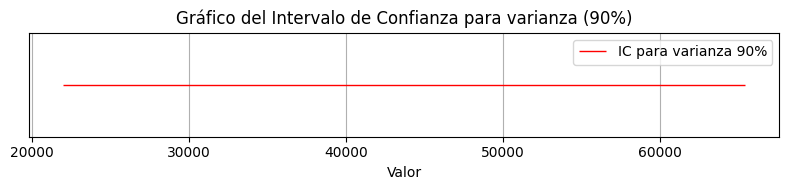

In [100]:
plt.figure(figsize=(8, 2))
plt.hlines(y=1, xmin=LI, xmax=LS, color='red', linewidth=1, label="IC para varianza 90%")
plt.title("Gráfico del Intervalo de Confianza para varianza (90%)")
plt.yticks([])
plt.xlabel("Valor")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

c) En base al resultado del intervalo de confianza, ¿Es posible que la varianza poblacional sea lo
que dice el fabricante en las etiquetas de los focos? Argumente con un intervalo con el 90% de
confianza para la varianza de la duración de la vida útil de los focos producidos por este
fabricante.

# Problema 2

Se han estado analizando dos nuevos aditivos de pintura con el fin de verificar si alguno de ellos tiene
significativamente menos variación que el otro en el tiempo de secado de la pintura.
Se pintaron 12 piezas de cada tipo de pintura y me midió el tiempo de secado:

A: 14.57, 15.01, 13.44, 9.92, 13.123, 13.25, 16.77, 10.948, 13.70, 17.61, 11.90, 16.78

B: 10.39, 10.43, 11.44, 9.71, 11.04, 11.70, 11.14, 9.85, 13.69, 9.47, 11.2, 11.9

In [101]:
data_a = [14.57, 15.01, 13.44, 9.92, 13.123, 13.25, 16.77, 10.948, 13.70, 17.61, 11.90, 16.78]
data_b = [10.39, 10.43, 11.44, 9.71, 11.04, 11.70, 11.14, 9.85, 13.69, 9.47, 11.2, 11.9]

1) Revisa el supuesto de Normalidad, que es requisito para usar el estadístico F en el intervalo de cociente
de varianzas. ¿Es posible inferir que la distribución de la variable siga una distribución Normal? ¿Por qué?

In [102]:
shapiro_a = stats.shapiro(data_a)
shapiro_b = stats.shapiro(data_b)

print(f"Shapiro A: {shapiro_a.pvalue}")
print(f"Shapiro B: {shapiro_b.pvalue}")

Shapiro A: 0.8469860661454653
Shapiro B: 0.3882341593493652


2) Calcula el intervalo de confianza al 95% e interpreta en el contexto del problema. Ilustra tu respuesta con
un gráfico del intervalo.

In [103]:
n_a = len(data_a)
n_b = len(data_b)

varianza_a = np.var(data_a, ddof=1)
varianza_b = np.var(data_b, ddof=1)

confianza = 0.95
alfa = 1 - confianza
df1 = n_a - 1
df2 = n_b - 1

valor_critico_f1 = stats.f.ppf(alfa / 2, df1, df2)
valor_critico_f2 = stats.f.ppf(1 - alfa / 2, df1, df2)

LI = (varianza_a / varianza_b) * valor_critico_f1
LS = (varianza_a / varianza_b) * valor_critico_f2

print(LI, LS)

1.2009390993990132 14.49123383983055


3. Concluye en el contexto del problema.

# Problema 3

El gerente de una compañía de baterías para automóvil afirma que sus productos durarán en promedio
3 años con una varianza de un año. Suponga que se toma una muestra de 5 baterías con duraciones
de 1.9, 2.4, 3, 3.5 y 4.2 años. Suponga que la distribución de las duraciones de la batería es
aproximadamente normal. Construya un intervalo del 95% de confianza para 𝜎2 y con base en esto,
determine si los datos proporcionan evidencia de que la afirmación acerca de la varianza poblacional
podría no ser válida.

In [104]:
data = [1.9, 2.4, 3, 3.5, 4.2]

In [105]:
confianza = 0.95
alfa = 1 - confianza
n = len(data)

varianza_muestral = np.var(data, ddof=1)

valor_critico_chi1 = stats.chi2.ppf(alfa / 2, n - 1)
valor_critico_chi2 = stats.chi2.ppf(1 - alfa / 2, n - 1)

LI = (n - 1) * varianza_muestral / valor_critico_chi2
LS = (n - 1) * varianza_muestral / valor_critico_chi1

print(LI, LS)

0.2925528225031148 6.729717415446278


# Problema 4

La empresa Elimar S.A. de C. V. fabrica propulsores a través de dos métodos. Un inspector está
interesado en evaluarlos para saber si mantienen la misma calidad respecto a las variaciones del ancho
de las hélices. Para ello obtiene experimentalmente los siguientes datos:
• Proceso 1: s1 = 5.1 mm con n1 = 12
• Proceso 2: s2 = 4.7 mm con n2 = 16
Suponiendo normalidad, ayúdelo a calcular el intervalo del cociente de varianzas y a decidir si es
posible inferir que los dos métodos mantienen la misma calidad (variaciones). Trabaje al nivel de
confianza del 95%

In [119]:
s1 = 5.1 ** 2
s2 = 4.7 ** 2

n1 = 12
n2 = 16

confianza = 0.95
alfa = 1 - confianza
df1 = n1 - 1
df2 = n2 - 1

valor_critico_f1 = stats.f.ppf(alfa / 2, df1, df2)
valor_critico_f2 = stats.f.ppf(1 - alfa / 2, df1, df2)

LI = (s1 / s2) / valor_critico_f2
LS = (s1 / s2) / valor_critico_f1

print(LI, LS)

0.39146386456282883 3.9208512780213685


# Problema 5

Los datos corresponden a dos muestras aleatorias: 1) la primera fue extraída de los usuarios que
tienen como actividad principal hacer llamadas en
el celular (X) y 2) la segunda proviene de la población que usa el celular para tener acceso a internet
(Y). Los datos corresponden a la duración de la batería en horas.

In [108]:
# Datos
x = [35.8, 22.2, 4, 32.6, 8.5, 42.5, 8, 3.8, 30, 12.8, 10.3, 35.5]
y = [14, 12.5, 16.4, 1.9, 9.9, 5.4, 1, 15.2, 4, 4.7]

a) ¿Se podría inferir que la duración de la batería en horas sigue una distribución Normal en cada una
de las poblaciones? (realiza la prueba de normalidad en R e interpreta los resultados)

In [109]:
shapiro_x = stats.shapiro(x)
print(f"Shapiro X: {shapiro_x.pvalue}")

shapiro_y = stats.shapiro(y)
print(f"Shapiro Y: {shapiro_y.pvalue}")

Shapiro X: 0.10753509102081493
Shapiro Y: 0.2661408954879368


b) Calcula un Intervalo de confianza del 99% para estimar el cociente de las varianzas poblacionales
de la duración de la batería (usa la función var.test)

In [110]:
confianza = 0.99
alfa = 1 - confianza
n_x = len(x)
n_y = len(y)

varianza_x = np.var(x, ddof=1)
varianza_y = np.var(y, ddof=1)

valor_critico_f1 = stats.f.ppf(alfa / 2, n_x - 1, n_y - 1)
valor_critico_f2 = stats.f.ppf(1 - alfa / 2, n_x - 1, n_y - 1)

LI = (varianza_x / varianza_y) * valor_critico_f1
LS = (varianza_x / varianza_y) * valor_critico_f2

print(LI, LS)

1.083732284466042 37.88796628411866


c) ¿Se pudiera inferir que las varianzas poblacionales son iguales en base a los resultados del
intervalo? Explica la respuesta